In [1]:
import sys
from PIL import Image
import glob
import os
import random
import imageio

In [9]:
image_folder = "Nexus_Image_Iterator/"
final_gif_name = "colloboartion_grid_01"
final_pieces = glob.glob(image_folder+"*_final_*.png")
grid_size = 9

widths = []
heights = []

for i in range(len(final_pieces)):
    im = Image.open(final_pieces[i])
    widths.append(im.size[0])
    heights.append(im.size[1])
    
w = min(heights) 
h = min(widths) 

# resize loop

for i in range(len(final_pieces)):
    im = Image.open(final_pieces[i])
    if im.size[0] != w or im.size[1] != h:
        wpercent = (w/float(im.size[0]))
        hsize = int((float(im.size[1])*float(wpercent)))
        img = im.resize((w,hsize), Image.ANTIALIAS)
        img.save(final_pieces[i].replace(".jpg", "").replace(".png", "") + str(w) + '_resized.png') 
        final_pieces[i] = final_pieces[i].replace(".jpg", "").replace(".png", "") + str(w) + '_resized.png'
        
# create gif folder and subdirectories
os.mkdir(final_gif_name)

In [21]:
checker_grid = []

odds_one_row = [1 if x%2==0 else 0 for x in range(grid_size)]
even_one_row = [0 if x%2==0 else 1 for x in range(grid_size)]
print(odds_one_row)

for i in range(grid_size):
    if i%2==0:
        checker_grid.append(odds_one_row)
    else:
        checker_grid.append(even_one_row)


checker_grid

[1, 0, 1, 0, 1, 0, 1, 0, 1]


[[1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1],
 [0, 1, 0, 1, 0, 1, 0, 1, 0],
 [1, 0, 1, 0, 1, 0, 1, 0, 1]]

In [51]:
len(odds_one_row)

9

In [52]:
len(checker_grid)

9

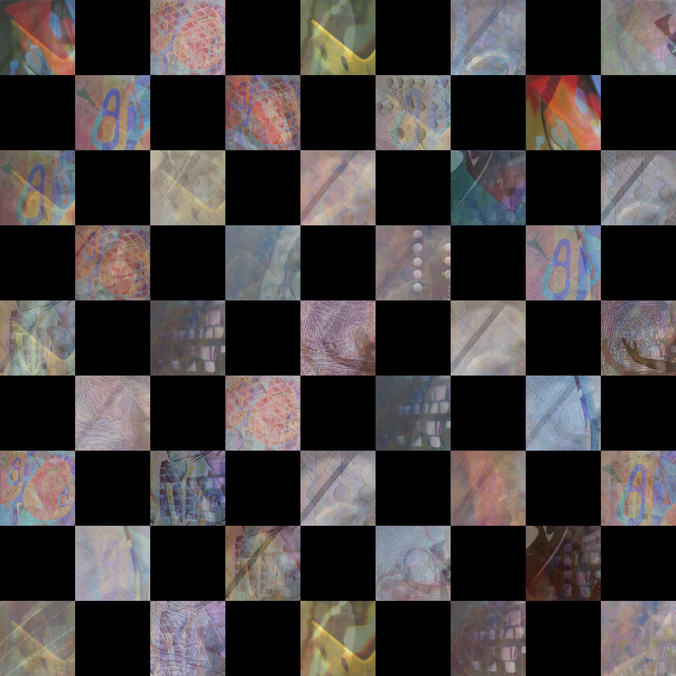

In [77]:
def create_single_grid(matrix, resized_image_list, image_suffix, folder, grid_size=grid_size):
    images = [Image.open(x) for x in resized_image_list[0:grid_size*grid_size+1]]

    widths, heights = zip(*(i.size for i in images))

    # assuming same size images
    total_width = widths[0]*grid_size
    total_height = heights[0]*grid_size

    new_im = Image.new('RGB', (total_width, total_height))

    x_offset = 0
    y_offset = 0
    x_placement = 0
    y_placement = 0
    image_list_num = 0
    
    for i in range((grid_size)**2+1):
        if matrix[x_placement][y_placement] == 1:
            new_im.paste(images[image_list_num], (x_offset,y_offset))
            image_list_num += 1
        x_offset += im.size[0]
        x_placement += 1
        if i != 0 and i%(grid_size) == 0:
            y_placement += 1
            y_offset += im.size[1]
        if i != 0 and (i+1)%(grid_size) == 0:
            x_offset = 0
            x_placement = 0


    new_im.save(folder + image_suffix + '_.png')
    new_im = new_im.resize((widths[0],heights[0]), Image.ANTIALIAS)
    new_im.save(folder + image_suffix + '_resized.png')
    return new_im

create_single_grid(checker_grid, final_pieces[0:81], "checkers_test_01", image_folder, grid_size=9)

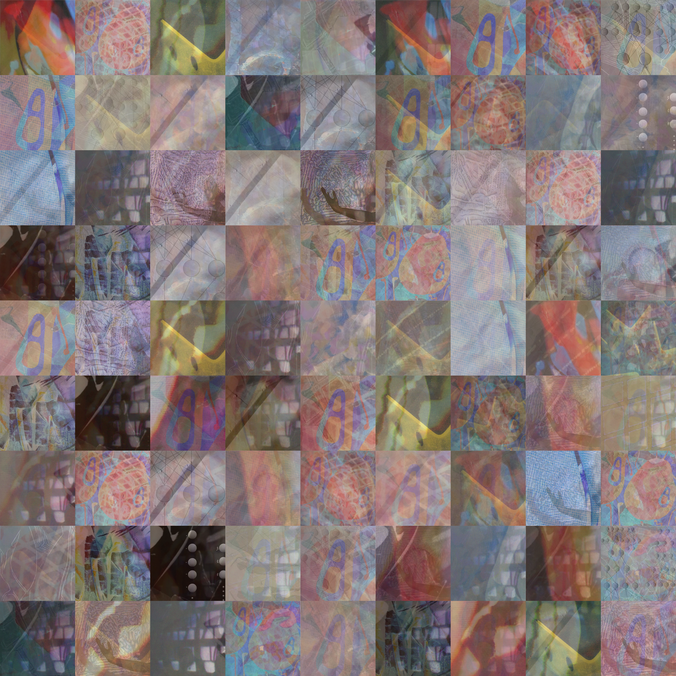

In [78]:
create_single_grid([[1 for x in range(9)] for y in range(9)], final_pieces, "all_test_01", image_folder, grid_size=9)

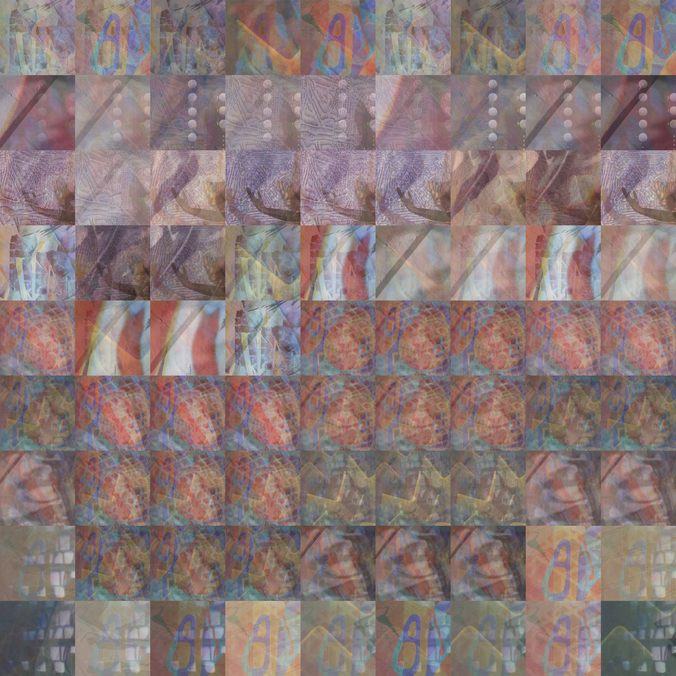

In [80]:
create_single_grid([[1 for x in range(9)] for y in range(9)], sorted(final_pieces), "all_test_01", image_folder, grid_size=9)

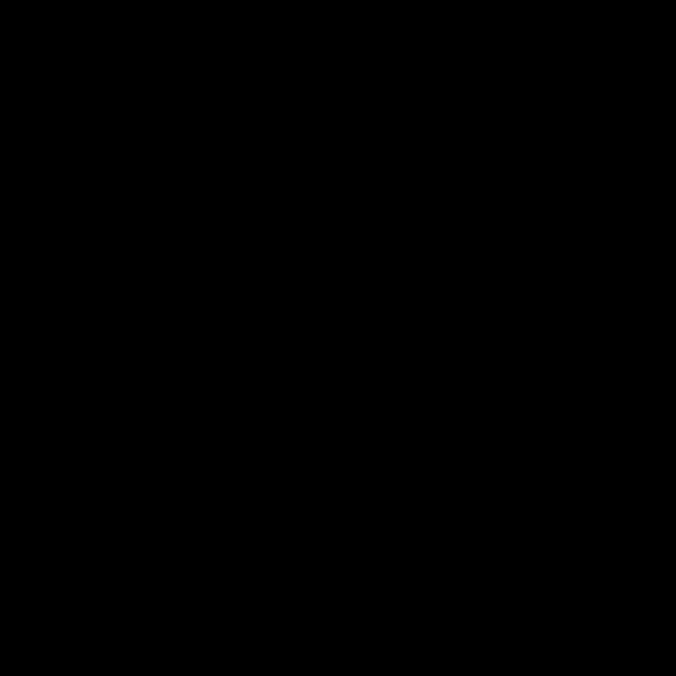

In [79]:
create_single_grid([[0 for x in range(9)] for y in range(9)], final_pieces, "blank_test_01", image_folder, grid_size=9)

In [68]:
[[1 for x in range(9)] for y in range(9)]

[[1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1]]